# Data Loading

In [1]:
Hepta2008 <- read.csv("Data/ProcessedDatasets/2008WomanHeptathlon.csv")
head(Hepta2008)
Hepta2008 <- as.matrix(Hepta2008[4:ncol(Hepta2008)])

,Athlete,Country,Overall.points,X100.m.H,HJ,SP,X200.m,LJ,JT,X800.m
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Nataliya Dobrynska,Ukraine,6733,1059,978,1015,944,1049,833,855
2,Hyleas Fountain,United States,6619,1158,1093,751,1058,969,704,886
3,Kelly Sotherton,Great Britain,6517,1097,1016,785,1040,953,622,1004
4,Jessica Zelinka,Canada,6490,1129,941,780,1016,887,742,995
5,Anna Bogdanova,Russia,6465,1111,1054,799,958,991,579,973
6,Karolina Tyminska,Poland,6428,1033,941,799,1040,1017,590,1008


# Rdimtools

## Probabilistic PCA implementation

In [2]:
# install.packages("Rdimtools")

In [ ]:
library("Rdimtools")

In [6]:
pdim3 <- do.ppca(Hepta2008, ndim = 3)

### Scores

In [7]:
head(pdim3$Y)

-1831.460,241.3572,-1648.573
-1833.431,487.5155,-1487.078
-1810.998,525.1089,-1467.773
-1727.490,431.6130,-1518.854
-1835.345,523.4377,-1452.959
-1837.612,474.7365,-1410.611


### Loadings

In [8]:
pdim3$projection

-0.23737177,0.16820693,-0.193102299
-0.24480817,0.49190615,-0.329687138
-0.07107381,-0.06320183,-0.685729951
-0.23639631,0.31523853,-0.008418267
-0.88528583,-0.36444512,0.228046812
0.05480220,-0.63385611,-0.505738065
-0.18988054,0.30293754,-0.275581425


In [9]:
# write.csv(pdim3$projection,"loadings_rdim_probabilistic.csv",row.names=FALSE)
# write.csv(do.ppca(Hepta2008, ndim = 5)$projection,"loadings_rdim_probabilistic5.csv",row.names=FALSE)

Hinton plot can be found in the ``hinton.plots`` notebook

## Bayesian PCA implementation

In [10]:
bdim3 <- do.bpca(Hepta2008, ndim = 3)

### Scores

In [11]:
head(bdim3$Y)

2541.255,2541.255,2541.255
2531.305,2531.305,2531.305
2490.534,2490.534,2490.534
2472.903,2472.903,2472.903
2472.892,2472.892,2472.892
2452.264,2452.264,2452.264


### Loadings


In [12]:
bdim5 <- do.bpca(Hepta2008, ndim = 5)

In [13]:
bdim3$projection

0.4378705,0.4378705,0.4378705
0.4023572,0.4023572,0.4023572
0.3259671,0.3259672,0.3259671
0.3967391,0.3967391,0.3967391
0.3737783,0.3737783,0.3737783
0.3147512,0.3147513,0.3147512
0.3793982,0.3793982,0.3793982


In [14]:
# write.csv(bdim3$projection,"loadings_rdim_bayesian.csv",row.names=FALSE)
# write.csv(do.bpca(Hepta2008, ndim = 5)$projection,"loadings_rdim_bayesian5.csv",row.names=FALSE)

Hinton plot can be found in the ``hinton.plots`` notebook

## Comparison

PPCA vs. Bayesian PCA

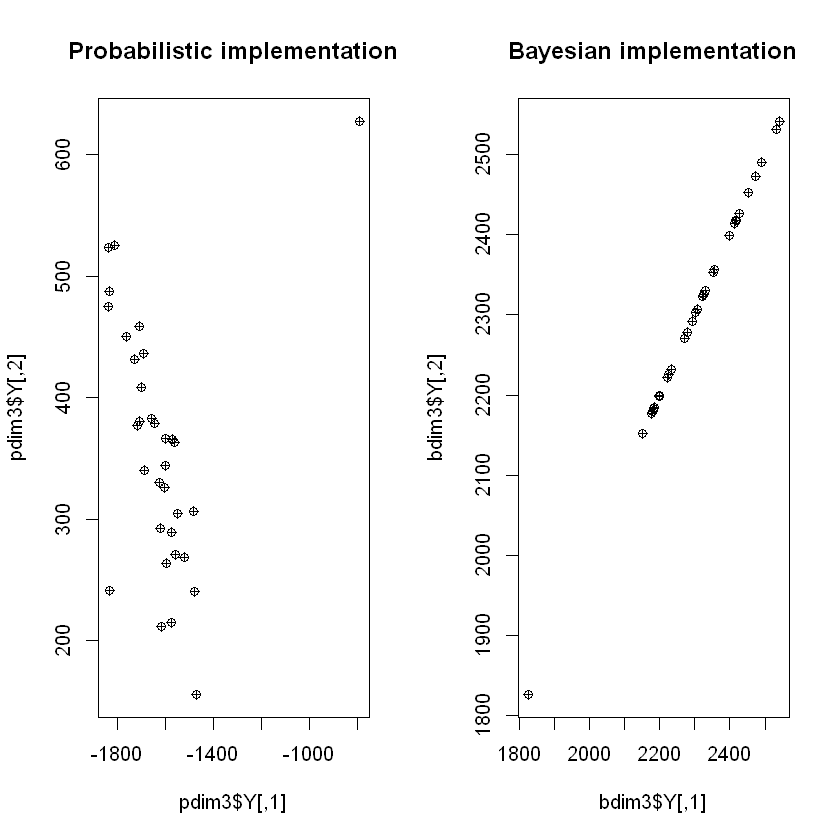

In [15]:
opar <- par(no.readonly=TRUE)
par(mfrow=c(1,2))
plot(pdim3$Y,  pch=10,  main="Probabilistic implementation")
plot(bdim3$Y, pch=10,  main="Bayesian implementation")
par(opar)

Regular PCA vs. PPCA & Bayesian PCA

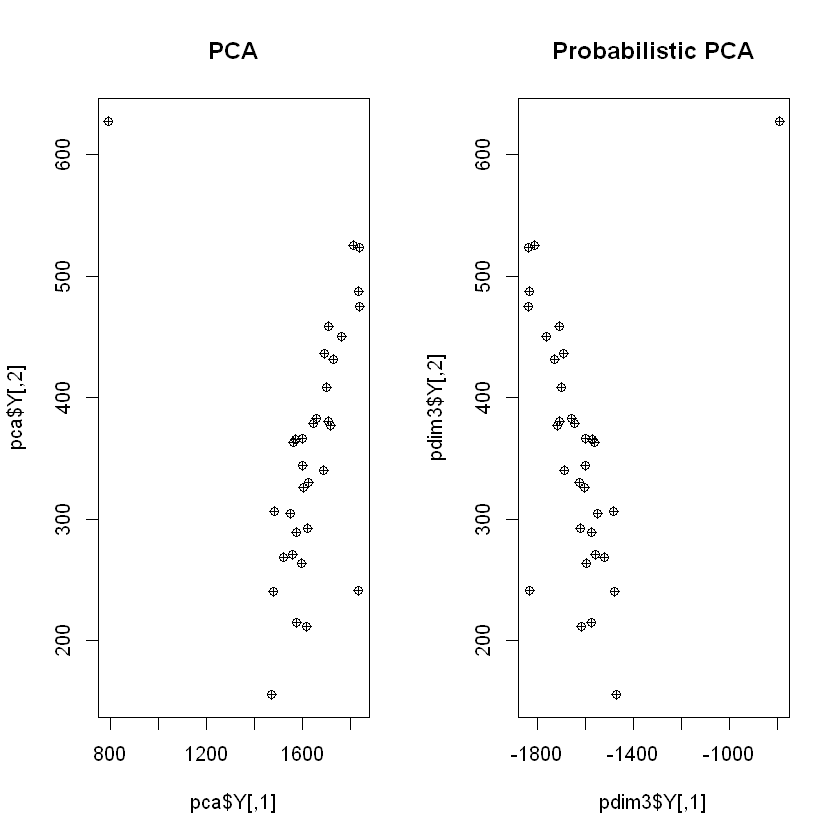

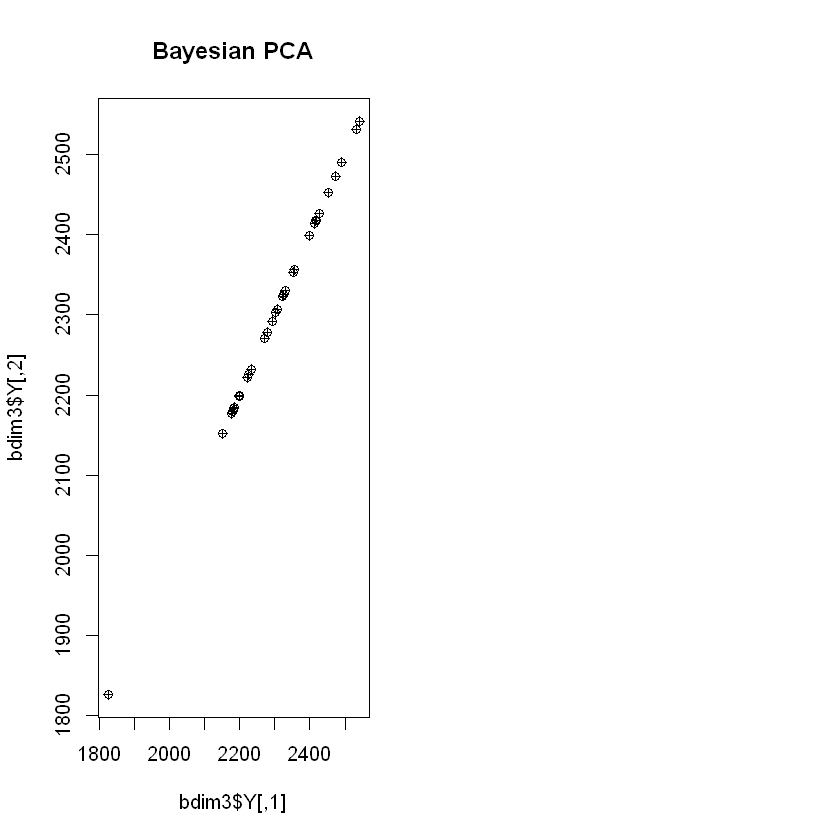

In [16]:
pca  <- do.pca(Hepta2008, ndim=2)
## Visualize
opar <- par(no.readonly=TRUE)
par(mfrow=c(1,2))
plot(pca$Y,  pch=10,  main="PCA")
plot(pdim3$Y, pch=10,  main="Probabilistic PCA")
plot(bdim3$Y, pch=10,  main="Bayesian PCA")
par(opar)

In [22]:
# write.csv(do.pca(Hepta2008, ndim = 3)$projection,"loadings_rdim_conventional.csv",row.names=FALSE)
# write.csv(do.pca(Hepta2008, ndim = 5)$projection,"loadings_rdim_conventional5.csv",row.names=FALSE)